In [9]:
from lstm_classifier import SimulacrumDiscriminator
from generator import SimulacrumGenerator
from processor import DataProcessor
from simulacrum_gan import SolemnSimulacrum
from keras.utils.vis_utils import plot_model
from keras.callbacks import CSVLogger
import random
import json
import numpy as np
import matplotlib.pyplot as plt

## Initalize required models for GAN
The architecture chosen requires us to initalize our models seperatly and feed them into the GAN model. This affords us a fair amount of flexibility, which was a nice side effect of writing various classes instead of containing everything within Jupyter Notebooks.

In [ ]:
discriminator = SimulacrumDiscriminator(max_len=15)
generator = SimulacrumGenerator(max_len=15)
simulacrum = SolemnSimulacrum(discriminator, generator)

## Train GAN
The GAN was written with some utility functions to facilitate training outside of the class. simply calling `simulacrum.train()` will extract all the results from messages, serialize them to our chose format, generate fake inputs via the generator, vectorize the inputs, and run the training loop. 

We can even specify how many epochs we'd like to train for using the named parameter `num_epochs`.

In [ ]:
simulacrum.train(num_epochs=500)

## Plot Progress Data
Along with generating some sample inputs and outputs, during the training loop we record and append to a CSV the Loss and Accuracy for both the GAN as a whole as well as the Discriminator. This makes it very easy to plot and analyze the performance of the neural network.

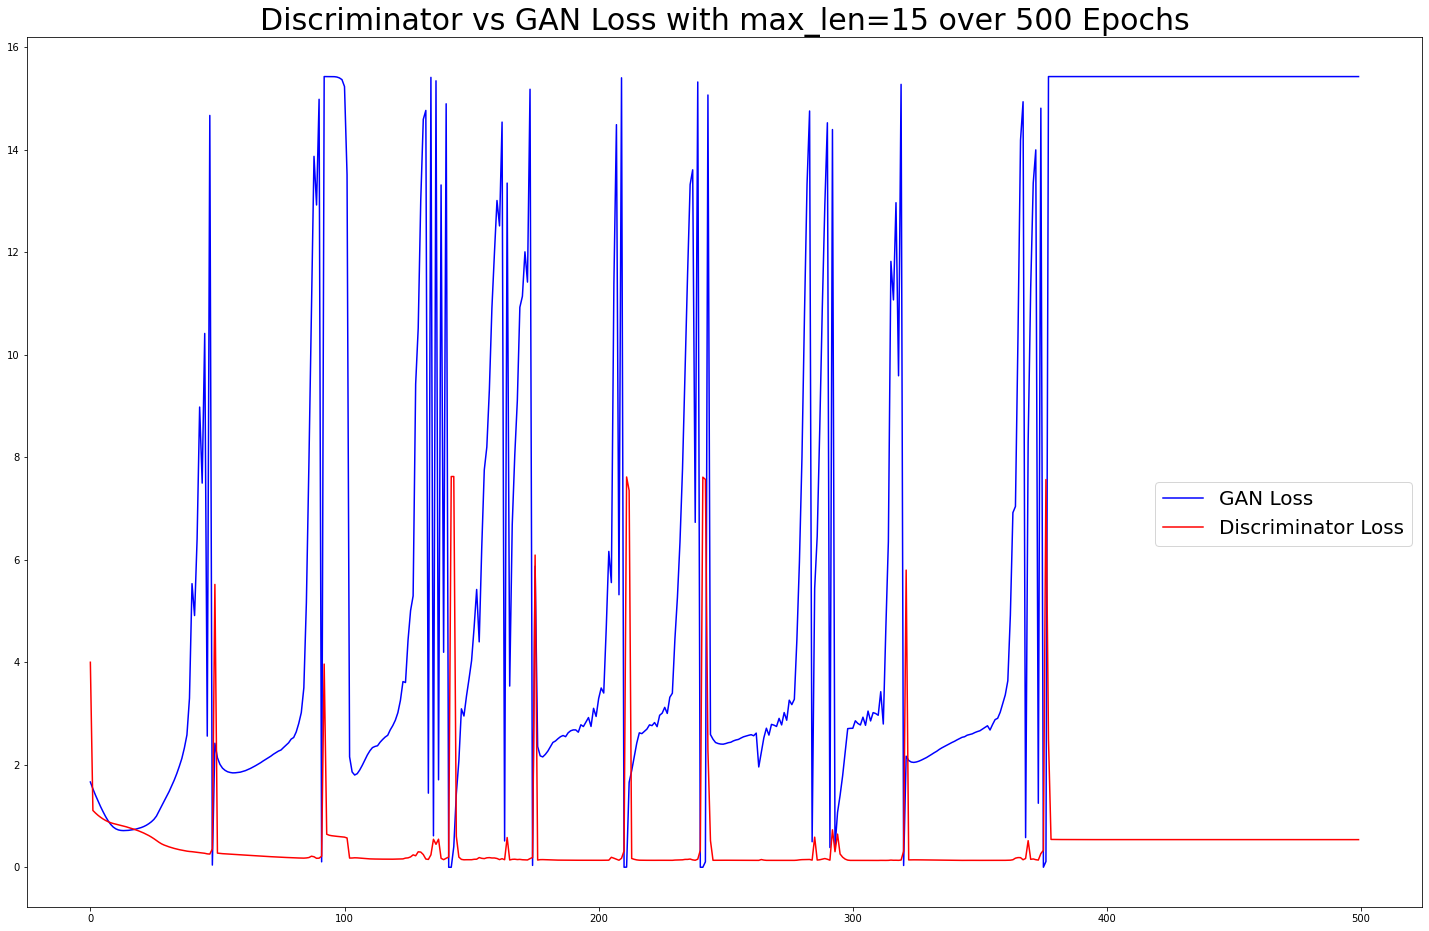

In [48]:
progress = np.loadtxt("data/gan_progress.csv", delimiter=",", skiprows=1, usecols=range(1,4))
# print(progress)
gan_loss = progress[:, 0]
disc_loss = progress[:, 1]
disc_acc = progress[:, 2]

plt.figure(figsize=(25,16))
plt.plot(gan_loss, c="blue", label="GAN Loss")
plt.plot(disc_loss, c="red", label="Discriminator Loss")
plt.legend(bbox_to_anchor=(1,.5), prop={'size': 20});
plt.title("Discriminator vs GAN Loss with max_len=15 over 500 Epochs", fontsize=30);

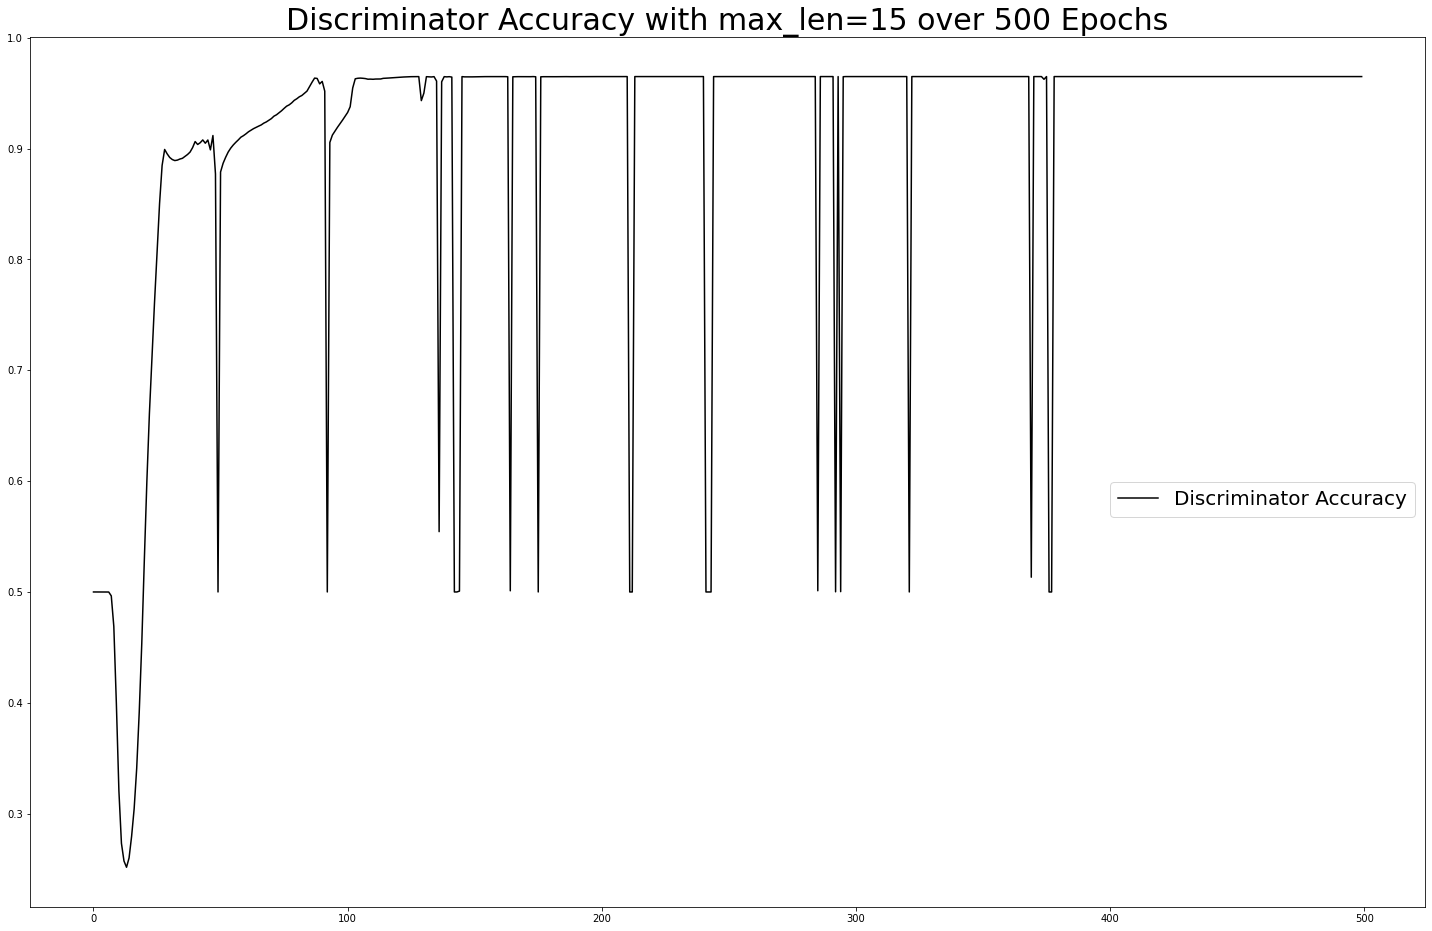

In [47]:
plt.figure(figsize=(25,16))
plt.plot(disc_acc, c="black", label="Discriminator Accuracy")
plt.legend(bbox_to_anchor=(1,.5), prop={'size': 20})
plt.title("Discriminator Accuracy with max_len=15 over 500 Epochs", fontsize=30);